In [1]:
import numpy as np


from preprocessing import load_data, split_data
from utils import load_image, visualization
from augmentation import augment_data
from classification import Classifier


# Importing the provided MNIST dataset

data shape: (2000, 240)
data lable shape: (2000,)


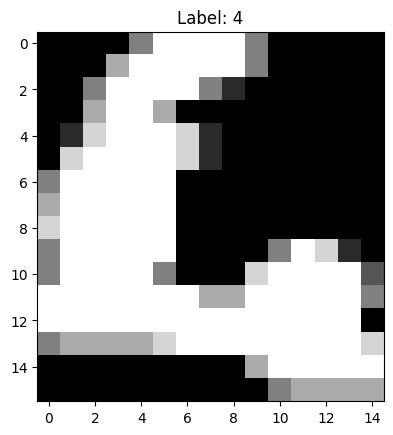

In [2]:
dataset_path = "../data/mfeat-pix"


img_shape = (16, 15)

num_classes = 10
samples_per_class = 200
train_samples_per_class = 100
test_samples_per_class = 100


data = load_data(dataset_path)
data_labels = np.repeat(np.arange(10), samples_per_class) #only possible as the data strucutre is known

print(f'data shape: {data.shape}')
print(f'data lable shape: {data_labels.shape}')

load_image(data, data_labels, index = 879)

# Spliting data into train and test

### As instructed, the data will be split 50/50, that is 1000 test images, and 1000 train images, each of which has 100 images per class.

In [3]:
x_train, x_test = split_data(data, data_labels, num_classes, samples_per_class, train_samples_per_class)
y_train, y_test = np.repeat(np.arange(10), train_samples_per_class), np.repeat(np.arange(10), train_samples_per_class)

print(f'x train shape: {x_train.shape}')
print(f'y train shape: {y_train.shape}')

print(f'x test shape: {x_test.shape}')
print(f'y test shape: {y_test.shape}')

x train shape: (1000, 240)
y train shape: (1000,)
x test shape: (1000, 240)
y test shape: (1000,)


# Data augmentation

Maybe also put this into experiments?

In [4]:
np.random.seed(42)   #So that results may be re-produced

augment_rotate = np.radians(12)
num_versions = 4

x_train_augmented = augment_data(x_train, img_shape, augment_rotate, num_versions)
y_train_augmented = np.repeat(np.arange(10), (1+num_versions)*train_samples_per_class) #only possible as the data strucutre is known

print(f'x train augmented shape: {x_train_augmented.shape}')
print(f'y train augmented shape: {y_train_augmented.shape}')

x train augmented shape: (5000, 240)
y train augmented shape: (5000,)


# Standardization

In [5]:
mean_a= np.mean(x_train_augmented)
std_a = np.std(x_train_augmented)

x_train_augmented = (x_train_augmented - mean_a)/std_a 
x_test_a = (x_test - mean_a)/std_a                         #standardize the test data whic is going to be used

#Also standerdize the non augmented data for later testing on just the basic data
mean= np.mean(x_train)
std = np.std(x_train)

x_train = (x_train - mean)/std
x_test = (x_test - mean)/std   


#checking if normalization worked
print(f'New x augmented mean: {np.mean(x_train_augmented)}')
print(f'New x augmented std: {np.std(x_train_augmented)}')
print('\n')
print(f'New x mean: {np.mean(x_train)}')
print(f'New x std: {np.std(x_train)}')

New x augmented mean: -2.2997899880768577e-16
New x augmented std: 0.9999999999999996


New x mean: -1.2126596023639044e-16
New x std: 0.9999999999999997


# Experimentation

### For every iteration of the model, 150 epochs will be run, and the loss function is categorical cross entropy.



In [6]:
epochs = 300
loss = 'cross_entropy'

## 1.  Single Hidden Layer

In [10]:
hidden_architecture_1 = [64]

optimizer_1 = 'gd'


model_1_a = Classifier(x_train_augmented, y_train_augmented, x_test_a, y_test, hidden_architecture_1) 
model_1_a.data_schuffel()
params_1_a, history_1_a  = model_1_a.train(loss = loss, optimizer= optimizer_1, epochs = 150, batch_size = 50)

KeyboardInterrupt: 

In [9]:
visualization(history_1_a, 'Single Hidden Layer with 60 Neurons')

NameError: name 'visualization' is not defined

## 2. Deeper Architectures

In [ ]:
hidden_architecture_2_a_1 = [64, 64, 64]
hidden_architecture_2_a_2 = [32, 64, 32]
hidden_architecture_2_a_3 = [64, 32, 64]
hidden_architecture_2_a_4 = [16, 32, 64]
hidden_architecture_2_a_5 = [64, 32, 16]

architecture_2_A= [[64, 64, 64], [32, 64, 32], [64, 32, 64], [16, 32, 64], [64, 32, 16]]

models_2_a_A = []
params_2_a_A = []
histories_2_a_A = []
accuracies_2_A = []

optimizer_2 = 'gd'

for architecture in architecture_2_A:
    model_i_a = Classifier(x_train_augmented, y_train_augmented, x_test_a, y_test, architecture) 
    model_i_a.data_schuffel()
    params_i_a, history_i_a  = model_i_a.train(loss = loss, optimizer= optimizer_2, epochs = 300, batch_size = 50, epoch_rate = 30)
    accuracy_i_a = model_i_a.accuracy(params_i_a, x_test_a, y_test)
    
    
    models_2_a_A.append(model_i_a)
    params_2_a_A.append(params_2_a_A)
    histories_2_a_A.append(history_i_a)
    accuracies_2_A.append(accuracies_2_A)

In [ ]:
fig.plot

## 3. Introducing Adam

In [ ]:
#whichever one is best from above
architecture_3 = []
optimizer_3 = 'adam'


model_3_a = Classifier(x_train_augmented, y_train_augmented, x_test_a, y_test, hidden_architecture_1) 
model_3_a.data_schuffel()
params_3_a, history_3_a  = model_3_a.train(loss = loss, optimizer= optimizer_3, epochs = 150, batch_size = 50)

In [ ]:
visualization(history_3_a, f'Utilizing Adam')

## 4. Adding Ridge and Lasso Regularization 

In [ ]:
#whichever one is best from above
architecture_4 = []
optimizer_4 = 'adam'
# shocase that all three can be utilized
loss_params_4_A = [{'lambda_lasso': 0.01, 'lambda_ridge': 0.0}, {'lambda_lasso': 0.0, 'lambda_ridge': 0.001},{'lambda_lasso': 0.01, 'lambda_ridge': 0.001}]


models_4_a_A = []
params_4_a_A = []
histories_4_a_A = []
accuracies_4_A = []


for loss_params in loss_params_4_A:
    model_i_a = Classifier(x_train_augmented, y_train_augmented, x_test_a, y_test, architecture) 
    model_i_a.data_schuffel()
    params_i_a, history_i_a  = model_i_a.train(loss = loss, loss_params= loss_params, optimizer= optimizer_4, epochs = 150, batch_size = 50, epoch_rate = 30)
    accuracy_i_a = model_i_a.accuracy(params_i_a, x_test_a, y_test)
    
    
    models_4_a_A.append(model_i_a)
    params_4_a_A.append(params_2_a_A)
    histories_4_a_A.append(history_i_a)
    accuracies_4_A.append(accuracies_2_A)

In [11]:
#make a plot of all of them and table of accuracies between the fidderent values

## 5. Hyperparameter Tuning

In [ ]:
#initizlize the classification training class
hidden_architecture_5 = [10, 50, 10]

optimizer_5 = 'adam' 

search_params = {'alpha':[0.001], 'lasso':[0, 0.001], 'ridge':[0.01] ,  'batch':[128, 256]} 


model_5_a = Classifier(x_train_augmented, y_train_augmented, x_test_a, y_test, hidden_architecture_5)
best_optimization_params, best_loss_params, best_batch_size = model_5_a.hyperparameter_search(5, loss, optimizer_5, search_params, epochs = 150)

# Final Model 

## Result on Non-augmented Data 

In [ ]:
hiddem_architectura = []
optimizer_final = 'adam'

model_final_a = Classifier(x_train_augmented, y_train_augmented, x_test_a, y_test, hiddem_architectura)
model_final_a.data_schuffel()
params_final_a, history_final_a = model_final_a.train(loss = loss, loss_params= best_loss_params, optimizer= optimizer_final, optimizer_params = best_optimization_params, 
                                   epochs = 300, batch_size = best_batch_size, epoch_rate = 25)

In [ ]:
#vsiaualize the results
visualization(history_final_a, f'Utilizing Adam')

## Comparison to Other Evaluated Models